In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import balanced_accuracy_score
%matplotlib inline

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [2]:
data = ("C:\\Users\Allen\Python Workspace\data-set\\companies.csv")
df = pd.read_csv(data)
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.800,471784.1000,New York,192261.83000
1,162597.70,151377.590,443898.5300,California,191792.06000
2,153441.51,101145.550,407934.5400,Florida,191050.39000
3,144372.41,118671.850,383199.6200,New York,182901.99000
4,142107.34,91391.770,366168.4200,Florida,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000


In [3]:
df.shape

(1000, 5)

In [4]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
ct = ColumnTransformer(transformers = [('encoder'
                                       , OneHotEncoder()
                                       , [3])]
                                       , remainder = 'passthrough')
X = np.array(ct.fit_transform(X))

labelencoder = LabelEncoder()

df['State'] = labelencoder.fit_transform(df['State'])
df = pd.get_dummies(df)
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


<AxesSubplot: >

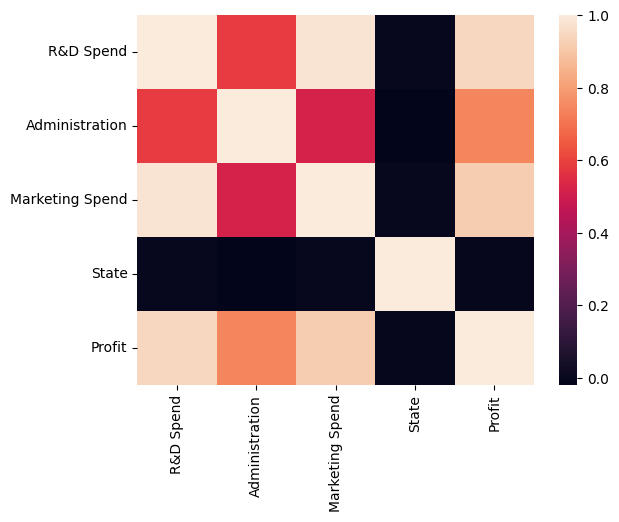

In [6]:
sns.heatmap(df.corr())

In [7]:
X = X[:, 1:]

X_train, X_test, Y_train, Y_test = train_test_split(X
                                                    , Y
                                                    , test_size = 0.2
                                                    , random_state = 0)

In [8]:
regressor = LinearRegression()

regressor.fit(X_train, Y_train)

print("\n Coefficients:", regressor.coef_)
print("\n Intercept:", regressor.intercept_)


 Coefficients: [-8.80536598e+02 -6.98169073e+02  5.25845857e-01  8.44390881e-01
  1.07574255e-01]

 Intercept: -51035.22972403464


In [9]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred.reshape(len(y_pred), 1)
                     , Y_test.reshape(len(Y_test), 1)), 1))

[[ 89790.62  89012.03]
 [ 88427.07  87654.56]
 [ 94894.68  94093.35]
 [175680.87 175396.26]
 [ 83411.73  83356.62]
 [110571.9  110395.79]
 [132145.23 105008.31]
 [ 91473.38  90687.29]
 [164597.05 164180.27]
 [ 53222.83  53483.76]
 [ 66950.19  66273.35]
 [150566.44 150393.72]
 [126915.21 125971.23]
 [ 59337.86  58694.93]
 [177513.91 176344.52]
 [ 75316.28  75297.23]
 [118248.14 118219.39]
 [164574.41 163462.67]
 [170937.29 132602.65]
 [182069.12 181574.5 ]
 [118845.03  97483.56]
 [ 85669.95  84909.72]
 [180992.59 180684.33]
 [ 84145.08  83391.64]
 [105005.84 104159.47]
 [101233.57 100404.  ]
 [ 53831.08  64926.08]
 [ 56881.41  56944.49]
 [ 68896.39  68210.89]
 [210040.01 191792.06]
 [120778.72 120738.7 ]
 [111724.87 110848.57]
 [101487.91 101352.27]
 [137959.03 137842.47]
 [ 63969.96  63306.4 ]
 [108857.91 107994.38]
 [186014.73 185502.53]
 [171442.64 171176.92]
 [174644.27 174364.28]
 [117671.49 117645.31]
 [ 96731.38  96616.93]
 [165452.26 164336.61]
 [107724.34 106865.86]
 [ 50194.54

In [10]:
r_squared_train = regressor.score(X_train, Y_train)
print("\n R-Squared Value for Training:", r_squared_train)

r_squared_test = regressor.score(X_test, Y_test)
print("\n R-Squared Value for Test:", r_squared_test)


 R-Squared Value for Training: 0.9585497032796175

 R-Squared Value for Test: 0.9112695892268834


In [11]:
coefficients = regressor.coef_
intercept = regressor.intercept_

equation = "y = "
for i in range(len(coefficients)):
    equation += f"{coefficients[i]:.2f}*x{i} + "
equation += f"{intercept:.2f}"

print(equation)

y = -880.54*x0 + -698.17*x1 + 0.53*x2 + 0.84*x3 + 0.11*x4 + -51035.23


1. What does the model equation look like? Compare it with thhe model obtained in part 1.
        The equation for the model in the first part is as follows: 
        y = -959.28*x0 + 699.37*x1 + 0.77*x2 + 0.03*x3 + 0.04*x4 + 42554.17
        
        The equation for the model in this part is as follows:
        y = -880.54*x0 + -698.17*x1 + 0.53*x2 + 0.84*x3 + 0.11*x4 + -51035.23
        
     The equations are both used to predict the Profit values. Both R values are also different. It can be noted that the amount of data is likely a factor on why both equations are different.
     
2. Determine the fitting of the model
        Both models has high correlation which is determined by the value of R. Also, the ratio of both training and test sets is almost similar (70-30) when determing the sensitivity of the data, therefor, it is likely to fit just right.
    
3. Does the number of sample data affect the success of the model? How so?
        Yes, mainly because outliers will have lesser impact on a dataset of 1000 compared to 50. It can be also noted that having a big number of data allows us to send trends much clearer.